In [ ]:
!pip install darts

In [ ]:
# Importando las librerías necesarias
import yfinance as yf
from darts import TimeSeries
from darts.metrics import mape
from darts.models import NaiveSeasonal, NaiveDrift, Prophet, Theta, FFT
from darts.utils.statistics import check_seasonality, plot_acf, plot_pacf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

[*********************100%%**********************]  1 of 1 completed


<Axes: xlabel='Date'>

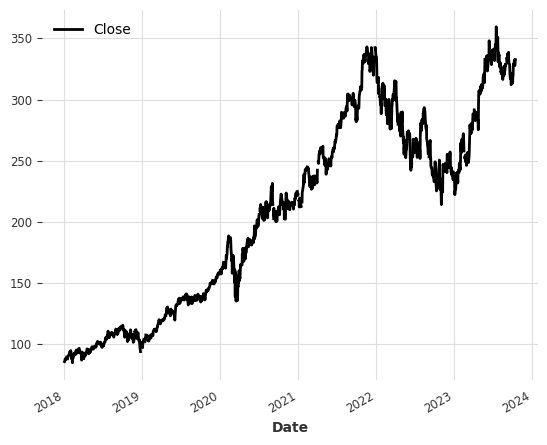

In [ ]:
data = yf.download('MSFT', start='2018-01-01', end='2023-10-17')
series = TimeSeries.from_dataframe(data.reset_index(), 'Date', 'Close', fill_missing_dates=True, freq='B')
series.plot()

Sea $X_t$, $t=1,...,T$ una serie de tiempo. Entonces $Y_t =\nabla X_t = X_t- X_{t-1}$ es la serie diferenciada, es el incremento en el momento $t$.

<Axes: xlabel='Date'>

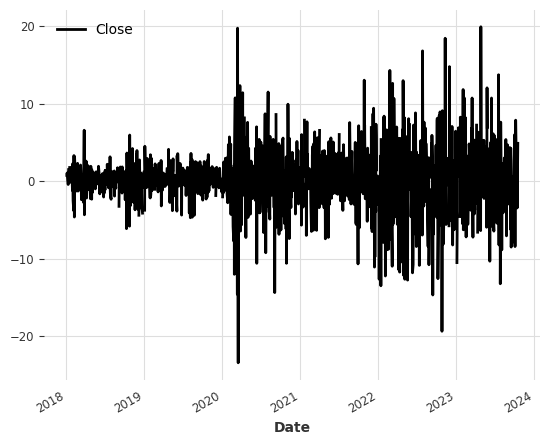

In [ ]:


# Diferenciación
diff_series = series.diff(n=1)
# Eliminar el primer valor ya que será NaN después de la diferenciación
diff_series = diff_series.slice(diff_series.start_time() + pd.DateOffset(days=1), diff_series.end_time())
diff_series.plot()


<Axes: xlabel='Date'>

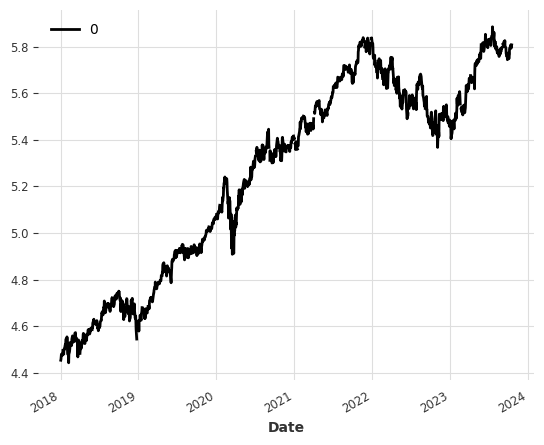

In [ ]:
# Logaritmo
log_values = np.log(series.values())
log_series = TimeSeries.from_times_and_values(series.time_index, log_values)  # Corrección aquí
log_series.plot()



<Axes: xlabel='Date'>

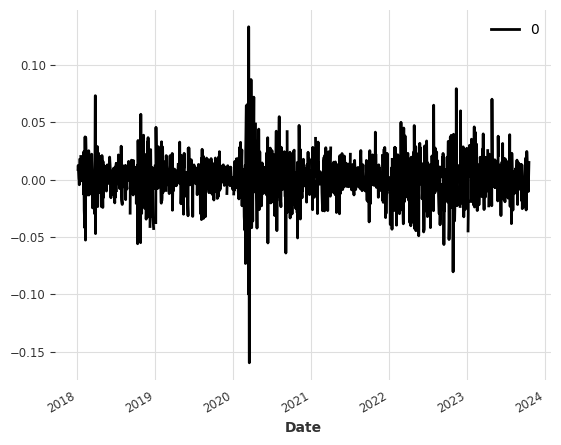

In [ ]:
# Diferenciación de la serie logarítmica
log_diff_series = log_series.diff(n=1)
# Eliminar el primer valor ya que será NaN después de la diferenciación
log_diff_series = log_diff_series.slice(log_diff_series.start_time() + pd.DateOffset(days=1), log_diff_series.end_time())
log_diff_series.plot()


Sea $X_t$, luego aplicamos el logaritmo $Y_t = log(X_t)$, $\nabla Y_t = Y_t - Y_{t-1} = log(X_t)-log(X_{t-1}) = log(\frac{X_t}{X_{t-1}}) = r_t$

[*********************100%%**********************]  1 of 1 completed


<Figure size 1200x500 with 0 Axes>

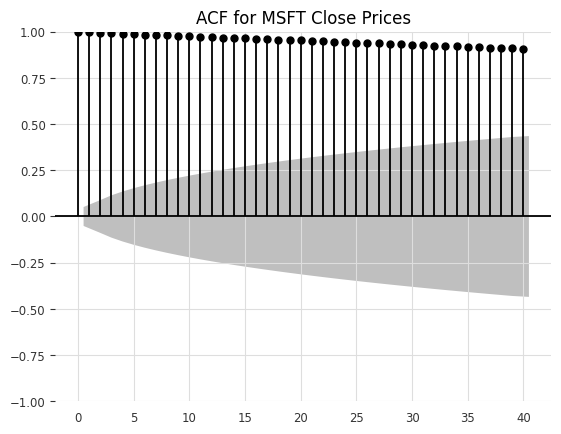

<Figure size 1200x500 with 0 Axes>

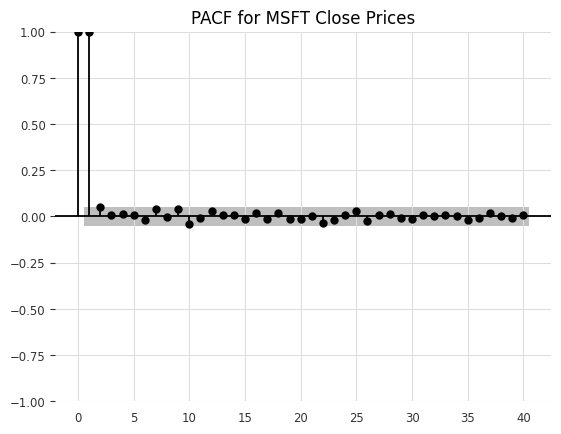

In [ ]:
import statsmodels.api as sm

data = yf.download('MSFT', start='2018-01-01', end='2023-10-17')
close_prices = data['Close']

plt.figure(figsize=(12, 5))
sm.graphics.tsa.plot_acf(close_prices, lags=40, title='ACF for MSFT Close Prices')
plt.show()

plt.figure(figsize=(12, 5))
sm.graphics.tsa.plot_pacf(close_prices, lags=40, title='PACF for MSFT Close Prices')
plt.show()



<Figure size 1200x500 with 0 Axes>

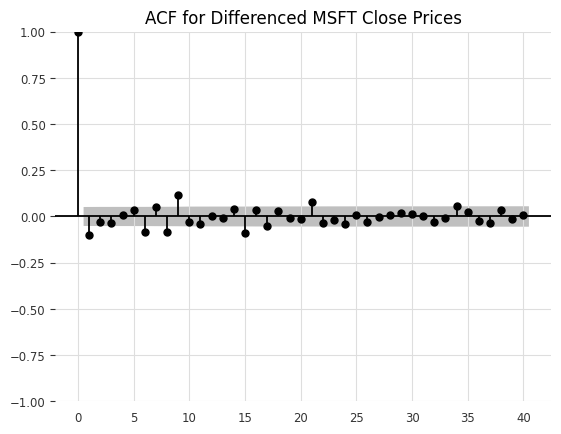

<Figure size 1200x500 with 0 Axes>

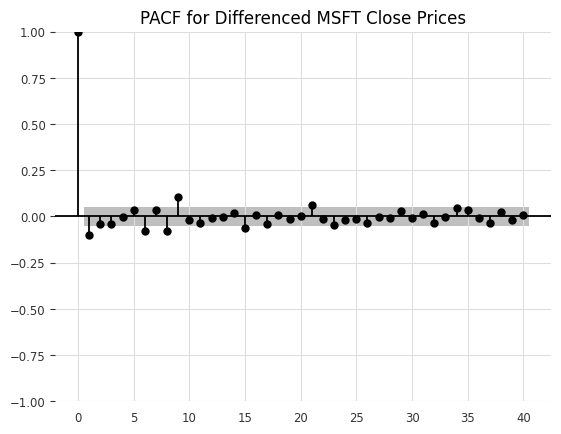

In [ ]:
# Serie Diferenciada
diff_series = close_prices.diff().dropna()

plt.figure(figsize=(12, 5))
sm.graphics.tsa.plot_acf(diff_series, lags=40, title='ACF for Differenced MSFT Close Prices')
plt.show()

plt.figure(figsize=(12, 5))
sm.graphics.tsa.plot_pacf(diff_series, lags=40, title='PACF for Differenced MSFT Close Prices')
plt.show()


<Figure size 1200x500 with 0 Axes>

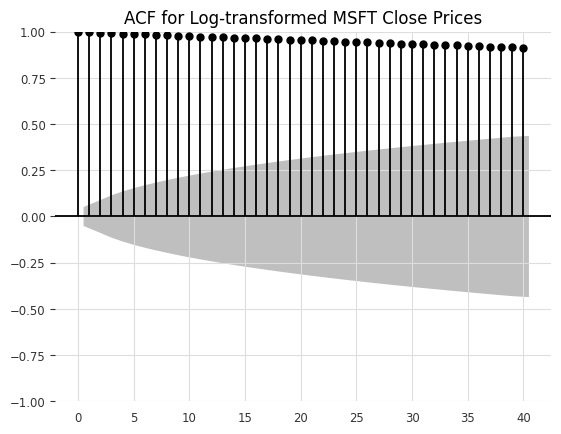

<Figure size 1200x500 with 0 Axes>

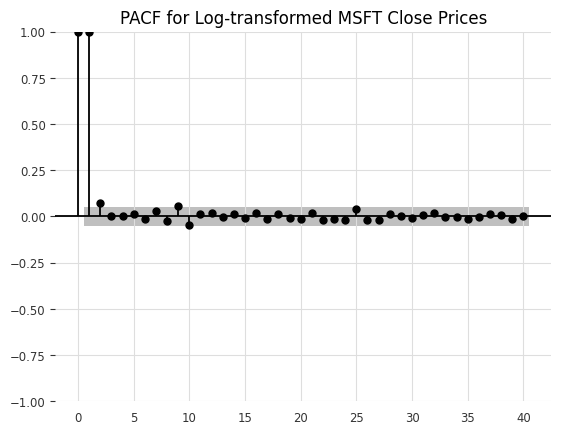

In [ ]:

# Logaritmo de la serie
log_series = np.log(close_prices)

plt.figure(figsize=(12, 5))
sm.graphics.tsa.plot_acf(log_series, lags=40, title='ACF for Log-transformed MSFT Close Prices')
plt.show()

plt.figure(figsize=(12, 5))
sm.graphics.tsa.plot_pacf(log_series, lags=40, title='PACF for Log-transformed MSFT Close Prices')
plt.show()



<Figure size 1200x500 with 0 Axes>

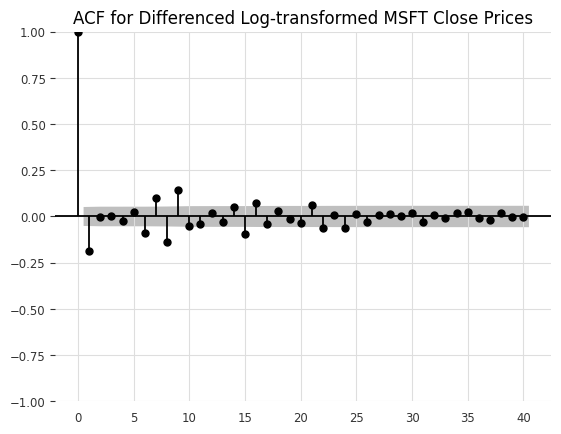

<Figure size 1200x500 with 0 Axes>

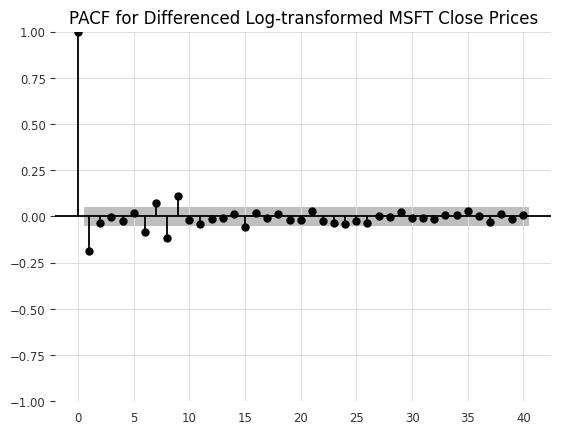

In [ ]:

# Diferencia de la serie del logaritmo
diff_log_series = log_series.diff().dropna()

plt.figure(figsize=(12, 5))
sm.graphics.tsa.plot_acf(diff_log_series, lags=40, title='ACF for Differenced Log-transformed MSFT Close Prices')
plt.show()

plt.figure(figsize=(12, 5))
sm.graphics.tsa.plot_pacf(diff_log_series, lags=40, title='PACF for Differenced Log-transformed MSFT Close Prices')
plt.show()